## Imports

In [1]:
#Do imports just once and for all
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import svds
from scipy.linalg import inv, norm
import math


import json

#instead of popup, plot images inline
%matplotlib inline

# Code

## Input

In [2]:
#Test Daten (dictionary) 
docs = {    
    'file1': ['ein','test','für','Dokument','eins'],    
    'file21': ['ein','weiteres','Dokument'],
    'file22': ['ein','weiteres','Dokument'],
    'file3': ['alle','guten','Dinge','sind','drei'],
    'file4': ['ein','test','für','Dokument','drei'], 
}

In [ ]:
# Testing load and save
# - Numpy Arrays: https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html
# - General: 
#   - Input/Output: https://docs.python.org/3.3/tutorial/inputoutput.html
#   - Write JSON Dump: http://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file-in-python

#import json
with open('files/test.dict', 'w+') as outfile:
    json.dump(docs, outfile)

with open('files/test.dict', 'r') as infile:
    docs2 = json.load(infile)
    
docs2

## Sparse DTM

In [ ]:
#https://datascience.blog.wzb.eu/2016/06/17/creating-a-sparse-document-term-matrix-for-topic-modeling-via-lda/
# -> adapted to fit TermxDoc Matrix without additional transpose at the end

#Init Vocabulary (Set)
vocab = set()

#Init Count of Non-Zero Values
n_nonzero = 0

#Iterate over documents an create vocabulary
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc (set of terms)
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # increase Non-Zero count by adding count of unique terms in this doc
    

#convert to numpy for processing
docpaths = np.array(list(docs.keys())) # keys of dictionary (order of dictionary is used, but this doesn't correspond to order of inserts!)
vocab = np.array(list(vocab)) 

#Array containing sorted indices
vocab_sorter = np.argsort(vocab)   

#print(vocab_sorter) #sorted indizes 
#print(vocab[vocab_sorter]) #outputs sorted vocabulary

ndocs = len(docpaths)
nvocab = len(vocab)

#Initialize components of COO-Matrix (values, row indizes, col indizes) with emtpy values (for all non-zero elements)
data = np.empty(n_nonzero, dtype=np.float32)     # all non-zero term frequencies at data[i,k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for [i,k]th data item (ith term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for [i,k]th data item (kth document)

#Init index (w.r.t. position in arrays of sparse COO matrix)
ind = 0   
global_indices = []
# go through all documents with their terms
for docpath, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    
    # add (unique) indices of current doc to a list which is later on used for df
    global_indices.extend(uniq_indices)
    
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    rows[ind:ind_end] = uniq_indices            # save the row index: index in 
    doc_idx = np.where(docpaths == docpath)     # get the document index for the document name
    cols[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

#calculate the term df by counting the occurence of the unqiue indices per document -> result is sorted by index
global_unique_indices, global_counts = np.unique(global_indices, return_counts=True)

#calculation of idf
idf = ndocs/global_counts

#select idf according to indices in "rows" vector for DTM and multiply it with "data"(tf) vector -> tf-idf
data = np.multiply(data,idf[rows])

#Construct DTM as COO Matrix
dtm = coo_matrix((data, (rows, cols)), shape=(nvocab, ndocs), dtype=np.float32)

In [ ]:
print(dtm.toarray())
print(vocab)
print(docpaths)

In [ ]:
k = 4

U, s, V = svds(dtm.asfptype(), k=k)

In [ ]:
import sys
try:
    self.tdm = load_npz(loadPath + "tfidf.tdm")

    self.docpaths = np.load(loadPath + "tfidf.docs")
    self.vocab = np.load(loadPath + "tfidf.vocab")
    self.idf= np.load(loadPath + "tfidf.idf")

except:
    print("TF-IDF: Load from file failed - ", sys.exc_info()[0])
    exc = sys.exc_info()

In [ ]:
exc

In [ ]:
vec = dtm.toarray()[:,0]

In [ ]:
dv = (inv(np.diag(s)).dot(U.transpose())).dot(vec)

In [ ]:
sim = (V.transpose().dot(dv))/(np.sqrt(np.diag(V.transpose().dot(V)))*norm(dv))

In [ ]:
V

In [ ]:
np.apply_along_axis( myfunction, axis=1, arr=mymatrix )

In [ ]:
np.sum(V.transpose()**2,axis=-1)**(1./2)

In [ ]:
for x in np.nditer(V):
    print(norm(x))

In [ ]:
sorter = np.argsort(sim)[::-1]
sim[sorter]

## TESTS

In [ ]:
doc = ['ein','ein','weiteres','Dokument']

In [ ]:
doc

In [ ]:
vec

In [ ]:
idf

In [ ]:
vocab

In [ ]:
a = [np.where(vocab==item) for i, item in enumerate(doc) if item in vocab]

In [ ]:
indices = [np.where(vocab == item) for i, item in enumerate(doc) if item in vocab]
indices_unique, counts = np.unique(indices, return_counts=True)
vec = np.empty(len(vocab), dtype=np.float32)
vec[indices_unique] = counts * idf[indices_unique]

In [ ]:
vec

In [ ]:
np.where(doc in vocab)

In [ ]:
from scipy.linalg import svd, inv

In [ ]:
U, s, V = svd(dtm.todense())

In [ ]:
s

In [ ]:
plt.plot(range(1,k+2),s, 'bo')
plt.axis([1, k, 0, s.max()])

In [ ]:
inv(np.diag(s))

In [ ]:
U.dot(np.diag(s)).dot(V.transpose())

In [ ]:
V

In [ ]:
np.diag(s)

In [ ]:
from scipy.sparse import coo_matrix, load_npz
saved_tdm = load_npz("../lib/files/tfidf.tdm.npz")

In [ ]:
saved_tdm.toarray()[1:100,1:100]

In [ ]:
U, s, V = svds(saved_tdm.asfptype(), k=20)

In [3]:
with open("../lib/files/bow.dict", 'r') as infile:
    docs = json.load(infile)

In [ ]:
docs

In [4]:
i = 0
for key in docs.keys():
    if(i> 30 ):
        break
    print(len(docs.get(key)))
    i+= 1
    


81
75
103
109
87
98
147
99
73
36
385
145
99
292
178
446
86
50
39
93
109
100
49
87
1573
43
45
122
320
37
205


In [7]:
docs.get('sci.space/59848')

['leech@cs.unc.edu',
 'jon',
 'leech',
 'space',
 'faq',
 '1215',
 'controversial',
 'questions',
 'keywords',
 'frequently',
 'asked',
 'questions',
 'articlei.d',
 'cs.controversy733694426',
 'expires',
 '6',
 'may',
 '1993',
 '20:00:26',
 'gmt',
 'world',
 'university',
 'north',
 'carolina',
 'chapel',
 'hill',
 '252',
 'supersedes',
 'controversy730956589@cs.unc.edu',
 'nntppostinghost',
 'mahler.cs.unc.edu',
 'archivename',
 'spacecontroversy',
 'lastmodified',
 'date',
 '930401',
 '14:39:06',
 'controversial',
 'questions',
 'issues',
 'periodically',
 'come',
 'much',
 'argument',
 'facts',
 'offered',
 'summaries',
 'attempt',
 'represent',
 'position',
 'much',
 'net',
 'community',
 'settled',
 'please',
 'dont',
 'bring',
 'unless',
 'theres',
 'something',
 'truly',
 'new',
 'discussed',
 'net',
 'cant',
 'set',
 'public',
 'policy',
 'thats',
 'representatives',
 'happened',
 'saturn',
 'v',
 'plans',
 'despite',
 'widespread',
 'belief',
 'contrary',
 'saturn',
 'v',
 'b

In [6]:
docs.get('sci.electronics/52434')

['et@teal.csn.org',
 'eric',
 'h',
 'taylor',
 'helpwithtrackingdevice',
 'summary',
 'underground',
 'underwater',
 'wireless',
 'methods',
 'keywords',
 'rogers',
 'tesla',
 'hertz',
 'underground',
 'underwater',
 'wireless',
 'radio',
 'nntppostinghost',
 'teal.csn.org',
 '4l',
 'laboratories',
 'expires',
 'fri',
 '30',
 'apr',
 '1993',
 '06:00:00',
 'gmt',
 '36',
 'article',
 '00969fba.e640ff10@aesop.rutgers.edu',
 'mcdonald@aesop.rutgers.edu',
 'writes',
 '',
 'variety',
 'waterproof',
 'housings',
 'could',
 'use',
 'real',
 'meat',
 'problem',
 'electronics',
 '.hence',
 'posting',
 'kind',
 'transmission',
 'would',
 'reliable',
 'underwater',
 'murky',
 'even',
 'nighttime',
 'conditions',
 'im',
 'sure',
 'sound',
 'feasible',
 'given',
 'distortion',
 'water',
 '.obviously',
 'direction',
 'would',
 'accurate',
 'range',
 'could',
 'relatively',
 'short',
 'imagine',
 '2',
 '3',
 'hundred',
 'yards',
 'would',
 'enough',
 'jim',
 'mcdonald',
 'refer',
 'patents',
 'james',

In [8]:
s = np.load("../lib/files/" + "svd.s.npy")

In [9]:
s

array([  130341.7265625,   130729.25     ,   131114.03125  ,
         131170.40625  ,   131591.890625 ,   132284.59375  ,
         133464.34375  ,   134327.171875 ,   134505.015625 ,
         134972.359375 ,   135237.796875 ,   135532.171875 ,
         136244.921875 ,   136502.6875   ,   137044.4375   ,
         137241.6875   ,   138224.546875 ,   138319.46875  ,
         138352.390625 ,   138934.1875   ,   139501.59375  ,
         139605.671875 ,   139776.765625 ,   141376.3125   ,
         142806.65625  ,   144658.453125 ,   144970.953125 ,
         145634.953125 ,   145784.953125 ,   145960.40625  ,
         146298.015625 ,   146864.40625  ,   146876.953125 ,
         146881.5625   ,   147042.15625  ,   147622.984375 ,
         148026.953125 ,   148365.203125 ,   148393.109375 ,
         148772.125    ,   148785.875    ,   149076.546875 ,
         151488.4375   ,   153181.75     ,   154087.09375  ,
         154803.6875   ,   155216.296875 ,   155345.84375  ,
         155991.4375   ,

[1, 200, 0, 1410324.4]

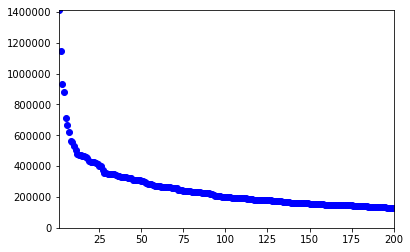

In [12]:
k = 200
plt.plot(range(1,k+1),s[::-1], 'bo')
plt.axis([1, k, 0, s.max()])